In [1446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
import warnings
import operator
from pandas import DataFrame,Series
from sklearn import preprocessing
warnings.filterwarnings('ignore')
plt.rcParams['figure.facecolor'] = 'white'
data = pd.read_csv('cleaned_data.csv')
df = data.copy()
data

,Title,Address,Type,Area,Price
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0
1,Ra mắt siêu phẩm Sunneva Island - biệt thự đả...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,NaN
2,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0
3,Chính chủ bán căn hộ Dual Key Tầng 16 dự án T...,"Phường Phước Mỹ, Sơn Trà",Bán căn hộ chung cư,120.0,NaN
4,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0
...,...,...,...,...,...
1995,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0
1996,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0
1997,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0
1998,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0


In [1447]:
data.isnull().sum()

Title        0
Address      2
Type         0
Area         2
Price      517
dtype: int64

In [1448]:
temp = data[~pd.isna(data).any(axis=1)].reset_index(drop = True)
temp

,Title,Address,Type,Area,Price
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0
1,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0
2,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0
3,Cần bán nhà phố thương mại Regal Pavillon Đà ...,"Phường Hòa Cường Nam, Hải Châu","Bán shophouse, nhà phố thương mại",120.0,18700.0
4,Sở hữu vĩnh viễn biệt thự Sunneva Island đẳng...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",275.0,31000.0
...,...,...,...,...,...
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0


In [1449]:
temp.isnull().sum()

Title      0
Address    0
Type       0
Area       0
Price      0
dtype: int64

In [1450]:
temp.describe()

,Area,Price
count,1482.000000,1.482000e+03
mean,269.862989,3.846196e+06
std,1681.191399,2.406397e+07
min,20.500000,1.000000e+03
25%,90.000000,3.700000e+03
50%,105.000000,6.250000e+03
75%,172.500000,2.300000e+04
max,40000.000000,3.404500e+08


In [1451]:
data_cleaned = temp.copy()
data_t = temp.copy()
data_t

,Title,Address,Type,Area,Price
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0
1,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0
2,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0
3,Cần bán nhà phố thương mại Regal Pavillon Đà ...,"Phường Hòa Cường Nam, Hải Châu","Bán shophouse, nhà phố thương mại",120.0,18700.0
4,Sở hữu vĩnh viễn biệt thự Sunneva Island đẳng...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",275.0,31000.0
...,...,...,...,...,...
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0


### Thêm cột quận

In [1452]:
arr_address = []
for i in data_t['Address']:
    x = i.split(", ")
    if len(x) == 1:
        if "P Hoà Minh" in x[0]:
            arr_address.append("liên chiểu")
        else:
            arr_address.append(x[0].strip().replace("Quận ","").lower())
    if len(x) == 2:
        arr_address.append(x[1].strip().replace("Quận ","").lower())    
data_t['district'] = pd.Series(arr_address, index=data_t.index)
data_t

,Title,Address,Type,Area,Price,district
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0,ngũ hành sơn
1,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0,ngũ hành sơn
2,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0,ngũ hành sơn
3,Cần bán nhà phố thương mại Regal Pavillon Đà ...,"Phường Hòa Cường Nam, Hải Châu","Bán shophouse, nhà phố thương mại",120.0,18700.0,hải châu
4,Sở hữu vĩnh viễn biệt thự Sunneva Island đẳng...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",275.0,31000.0,ngũ hành sơn
...,...,...,...,...,...,...
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0,hải châu
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0,cẩm lệ
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0,ngũ hành sơn
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0,thanh khê


### Thêm cột phân loại nhà và đất

In [1453]:
arr_type = []
for i in data_t['Type']:
    if "biệt thự" in i:
        arr_type.append("biệt thự")
    elif "nhà phố thương mại" in i:
        arr_type.append("nhà phố thương mại")
    elif "nhà mặt phố" in i:
        arr_type.append("nhà mặt phố")
    elif "chung cư" in i:
        arr_type.append("chung cư")
    elif "đất" in i:
        arr_type.append("đất")
    elif "condotel" in i:
        arr_type.append("căn hộ")
    elif "khác" in i:
        arr_type.append("khác")
    else:
        arr_type.append("nhà")
data_t['estate'] = pd.Series(arr_type, index=data_t.index)
data_t



,Title,Address,Type,Area,Price,district,estate
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0,ngũ hành sơn,biệt thự
1,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0,ngũ hành sơn,biệt thự
2,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0,ngũ hành sơn,biệt thự
3,Cần bán nhà phố thương mại Regal Pavillon Đà ...,"Phường Hòa Cường Nam, Hải Châu","Bán shophouse, nhà phố thương mại",120.0,18700.0,hải châu,nhà phố thương mại
4,Sở hữu vĩnh viễn biệt thự Sunneva Island đẳng...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",275.0,31000.0,ngũ hành sơn,biệt thự
...,...,...,...,...,...,...,...
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0,hải châu,nhà phố thương mại
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0,cẩm lệ,đất
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0,ngũ hành sơn,căn hộ
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0,thanh khê,đất


In [1454]:
data_t['price_m2'] = data_t['Price'] / data_t['Area']
data_t

,Title,Address,Type,Area,Price,district,estate,price_m2
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0,ngũ hành sơn,biệt thự,150.000000
1,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0,ngũ hành sơn,biệt thự,150.000000
2,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0,ngũ hành sơn,biệt thự,88000.000000
3,Cần bán nhà phố thương mại Regal Pavillon Đà ...,"Phường Hòa Cường Nam, Hải Châu","Bán shophouse, nhà phố thương mại",120.0,18700.0,hải châu,nhà phố thương mại,155.833333
4,Sở hữu vĩnh viễn biệt thự Sunneva Island đẳng...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",275.0,31000.0,ngũ hành sơn,biệt thự,112.727273
...,...,...,...,...,...,...,...,...
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0,hải châu,nhà phố thương mại,154.166667
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0,cẩm lệ,đất,40.000000
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0,ngũ hành sơn,căn hộ,59000.000000
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0,thanh khê,đất,28.164557


Label Encoding

In [1455]:
def MeanPrice(column,value):
     return data_t[data_t[column] == value]['price_m2'].mean()

['ngũ hành sơn' 'hải châu' 'liên chiểu' 'thanh khê' 'cẩm lệ' 'hòa vang'
 'sơn trà']


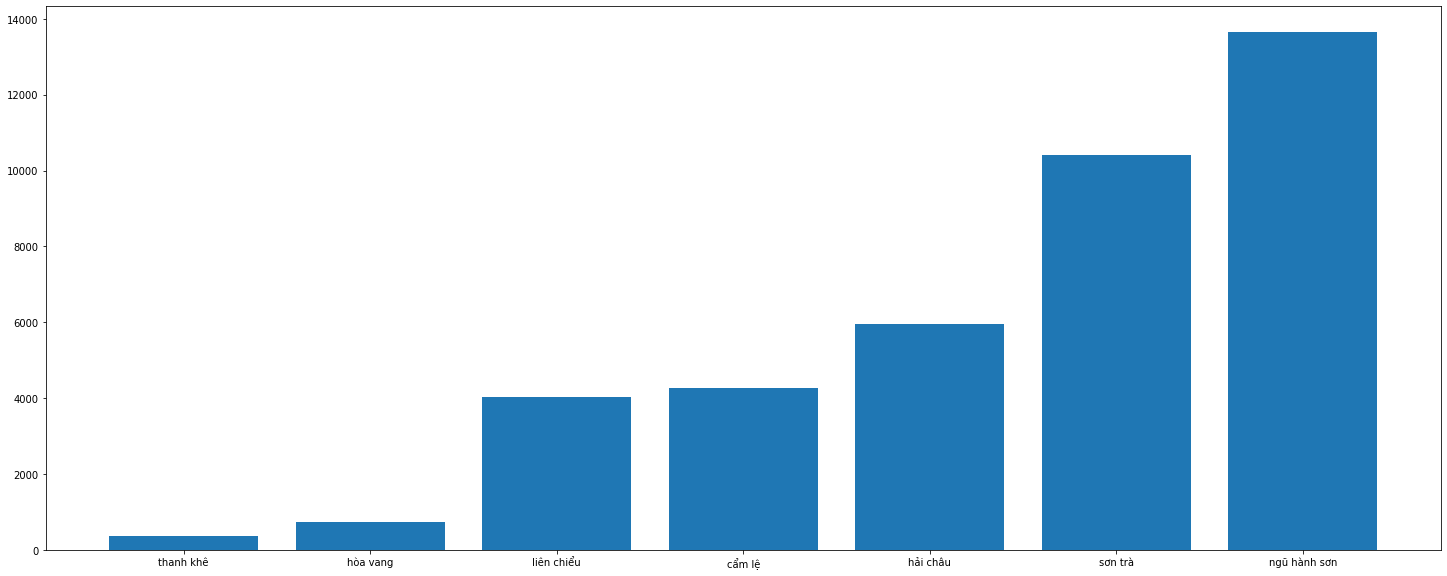

In [1456]:
ValueDistrist = data_t['district'].unique()
print(ValueDistrist)
arrDistrist = {}
for value in ValueDistrist:
    arrDistrist[value] = MeanPrice('district',value)
sorted_values = sorted(arrDistrist.items(), key=operator.itemgetter(1))
sorted_dict = {k: v for k, v in sorted_values}
plt.figure(figsize=(25,10))
plt.bar(*zip(*sorted_dict.items()))
plt.show()


In [1457]:
i = 0
for key in sorted_dict:
    data_t['district'][data_t['district'] == key] = i
    i = i + 1
data_t

,Title,Address,Type,Area,Price,district,estate,price_m2
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0,6,biệt thự,150.000000
1,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0,6,biệt thự,150.000000
2,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0,6,biệt thự,88000.000000
3,Cần bán nhà phố thương mại Regal Pavillon Đà ...,"Phường Hòa Cường Nam, Hải Châu","Bán shophouse, nhà phố thương mại",120.0,18700.0,4,nhà phố thương mại,155.833333
4,Sở hữu vĩnh viễn biệt thự Sunneva Island đẳng...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",275.0,31000.0,6,biệt thự,112.727273
...,...,...,...,...,...,...,...,...
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0,4,nhà phố thương mại,154.166667
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0,3,đất,40.000000
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0,6,căn hộ,59000.000000
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0,0,đất,28.164557


['biệt thự' 'nhà phố thương mại' 'đất' 'nhà mặt phố' 'nhà' 'chung cư'
 'khác' 'căn hộ']


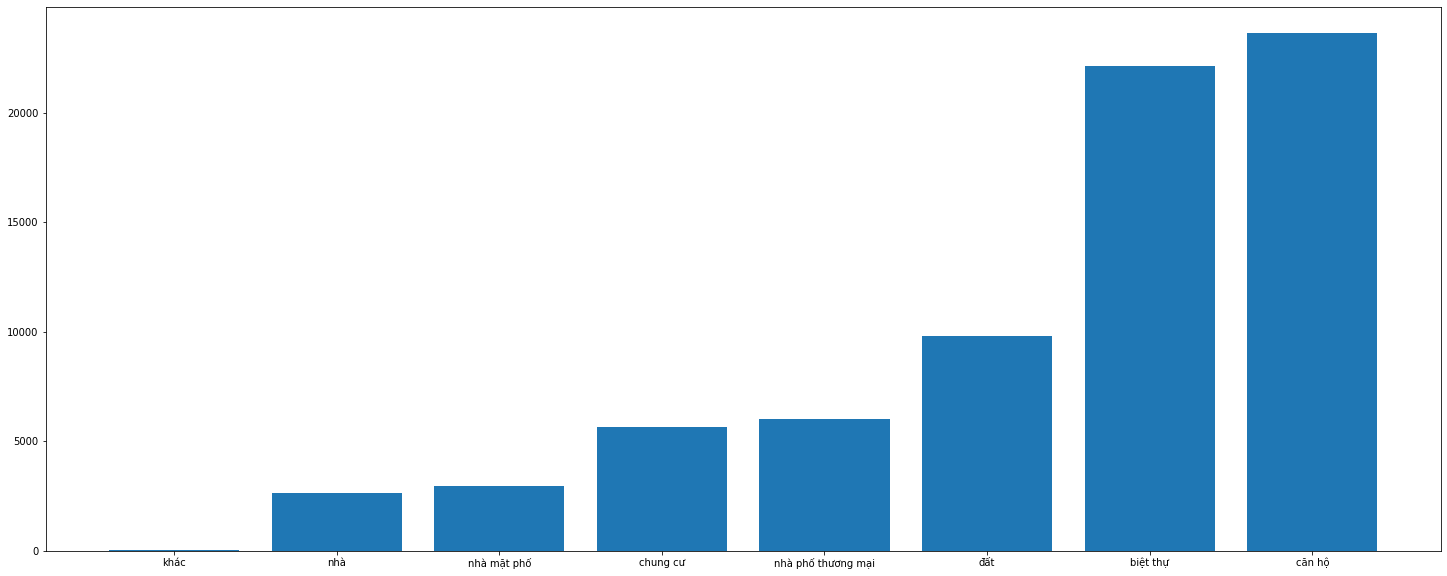

In [1458]:
ValueEstate = data_t['estate'].unique()
print(ValueEstate)
arrEstate = {}
for value in ValueEstate:
    arrEstate[value] = MeanPrice('estate',value)
sorted_values_estate = sorted(arrEstate.items(), key=operator.itemgetter(1))
sorted_dict_estate = {k: v for k, v in sorted_values_estate}
plt.figure(figsize=(25,10))
plt.bar(*zip(*sorted_dict_estate.items()))
plt.show()

In [1459]:
n = 0
for key in sorted_dict_estate:
    data_t['estate'][data_t['estate'] == key] = n
    n = n + 1
data_t

,Title,Address,Type,Area,Price,district,estate,price_m2
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0,6,6,150.000000
1,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0,6,6,150.000000
2,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0,6,6,88000.000000
3,Cần bán nhà phố thương mại Regal Pavillon Đà ...,"Phường Hòa Cường Nam, Hải Châu","Bán shophouse, nhà phố thương mại",120.0,18700.0,4,4,155.833333
4,Sở hữu vĩnh viễn biệt thự Sunneva Island đẳng...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",275.0,31000.0,6,6,112.727273
...,...,...,...,...,...,...,...,...
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0,4,4,154.166667
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0,3,5,40.000000
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0,6,7,59000.000000
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0,0,5,28.164557


<AxesSubplot:>

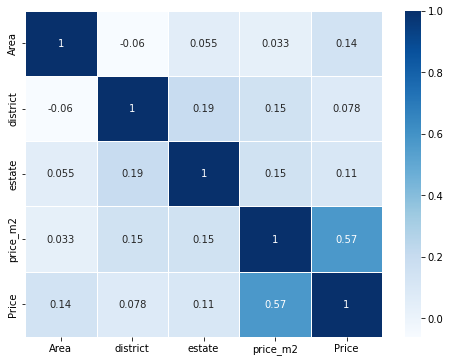

In [1462]:
data_t['district'] = data_t['district'].astype(int)
data_t['estate'] = data_t['estate'].astype(int)
plt.figure(figsize=(8,6))
sns.heatmap(data_t[['Area','district','estate','price_m2','Price']].corr(),cmap='Blues',annot=True, linewidths=1 )

In [1463]:
data_non_oulier = data_t.copy()

# Train Test Split

In [1464]:
Y=data_t['Price']
X=data_t.drop(['Price'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=101)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.25, random_state=101)


# Outlier tập train

<AxesSubplot:>

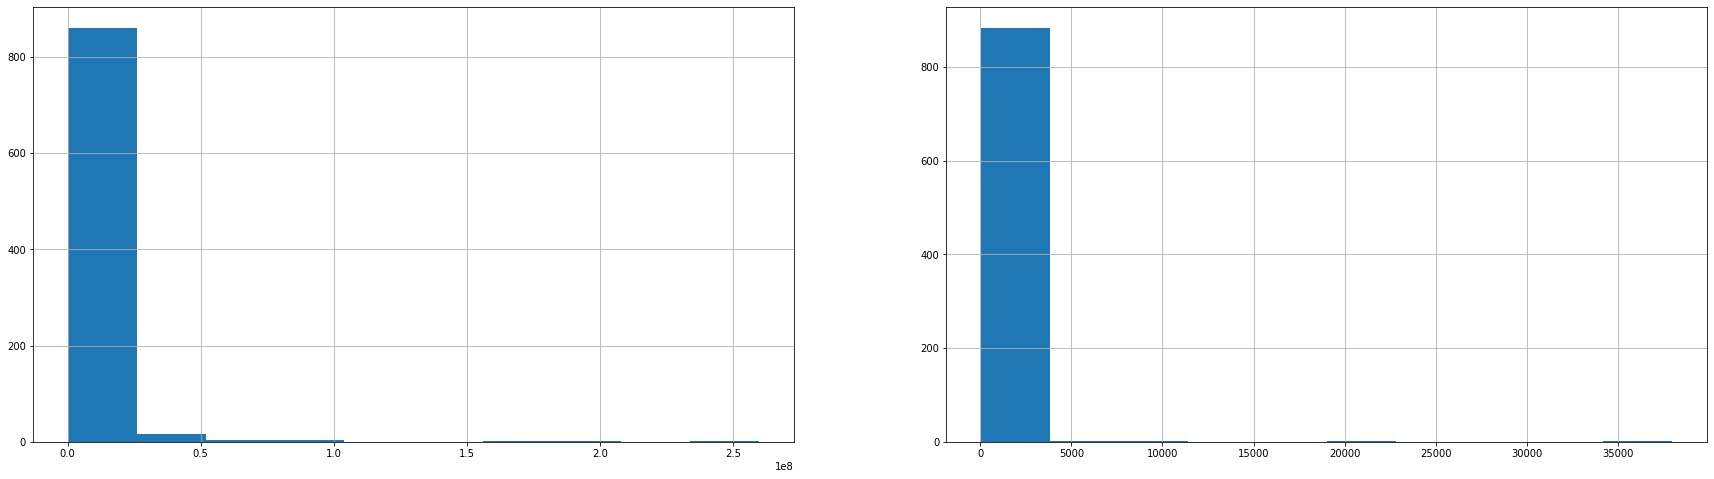

In [1465]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.subplot(1, 2, 1)
y_train.hist()
plt.subplot(1, 2, 2)
x_train.Area.hist()

<AxesSubplot:xlabel='Price'>

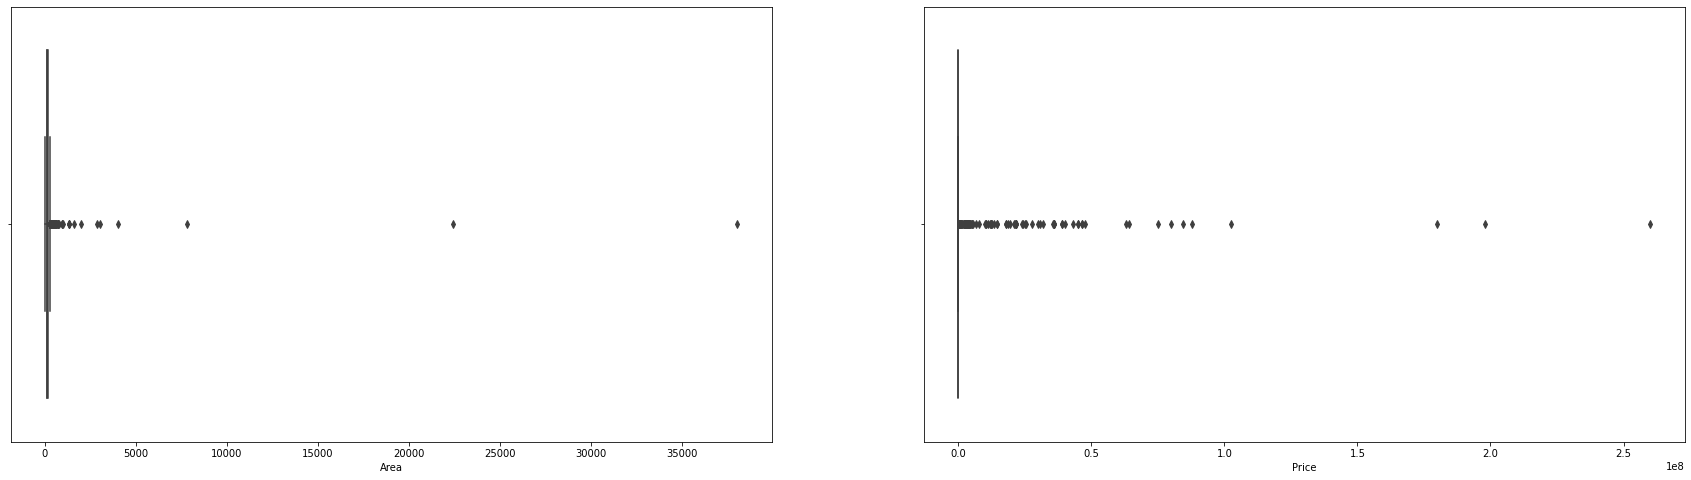

In [1466]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x=x_train['Area'])
plt.subplot(1, 2, 2)
sns.boxplot(x=y_train)

<AxesSubplot:>

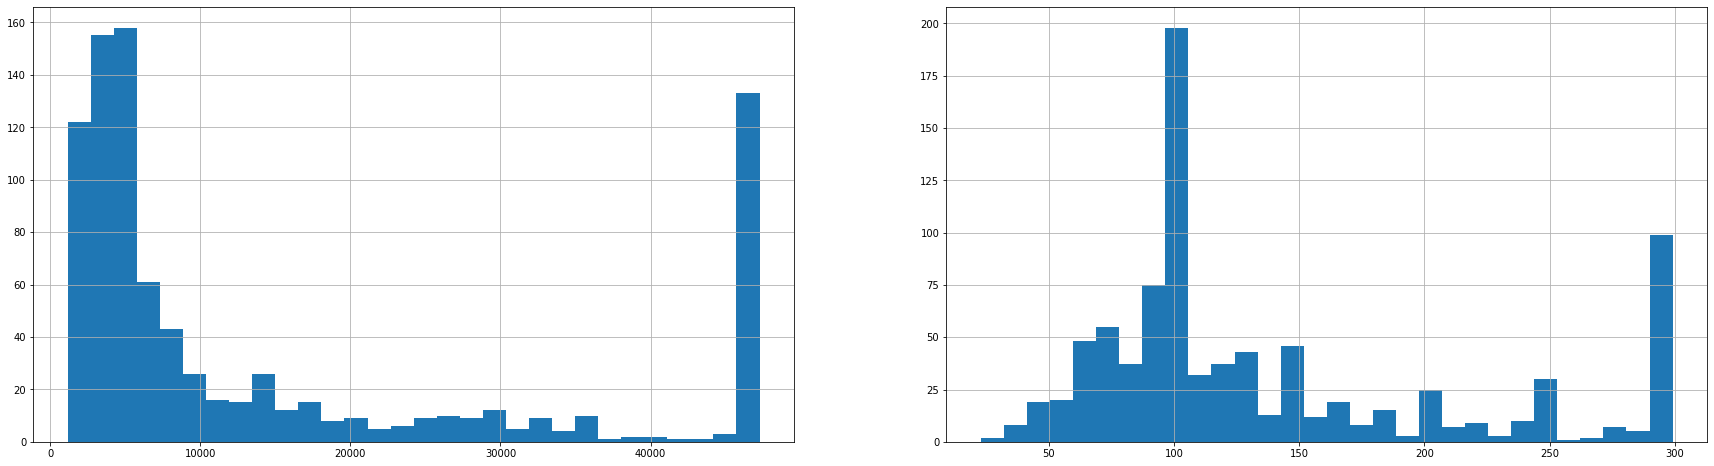

In [1467]:
def skewed_outliers(sr: Series):
    IQR = sr.quantile(0.75) - sr.quantile(0.25)
    upper_bridge = sr.quantile(0.75) + (IQR * 1.5)
    sr.loc[sr >= int(upper_bridge)] = int(upper_bridge)
    return sr
y_train = skewed_outliers(y_train)
x_train['Area'] = skewed_outliers(x_train['Area'])
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.subplot(1, 2, 1)
y_train.hist(bins=30)
plt.subplot(1, 2, 2)
x_train['Area'].hist(bins=30)


<AxesSubplot:xlabel='Area'>

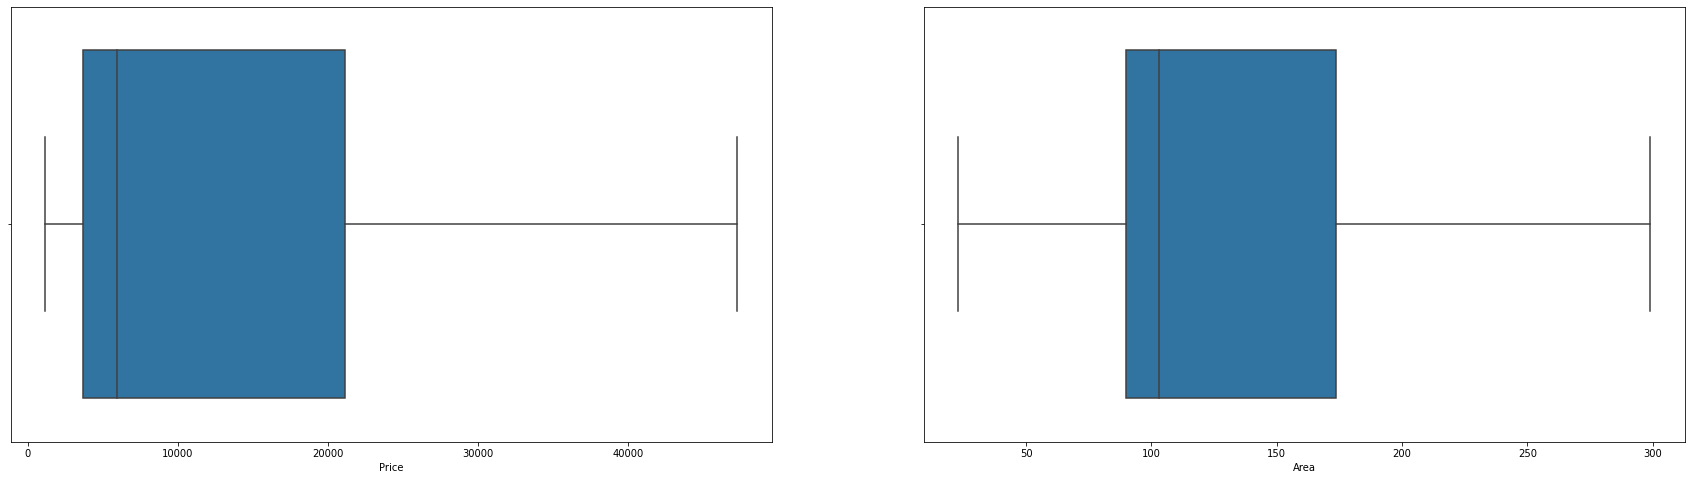

In [1468]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x=y_train)
plt.subplot(1, 2, 2)
sns.boxplot(x=x_train['Area'])

## Chuẩn hoá Min-Max-Scaling 

### Data_cleaned

In [1469]:
def MinMaxScaling(df: DataFrame,column:list):
    min_max=MinMaxScaler()
    df_minmax=pd.DataFrame(min_max.fit_transform(df[column]),columns = column)
    return df_minmax
data_scaler_first = MinMaxScaling(data_non_oulier,['Area','Price'])
data_scaler_first['district'] = data_non_oulier['district']
data_scaler_first['estate'] = data_non_oulier['estate']
data_scaler_first

,Area,Price,district,estate
0,0.005490,0.000103,6,6
1,0.006991,0.000129,6,6
2,0.005490,0.062033,6,6
3,0.002489,0.000052,4,4
4,0.006366,0.000088,6,6
...,...,...,...,...
1477,0.002489,0.000051,4,4
1478,0.001989,0.000009,3,5
1479,0.000738,0.008662,6,7
1480,0.003439,0.000010,0,5


### Train

In [1470]:
x_train_new = x_train.copy()
x_train_new['Price'] = y_train
data_scaler_train = MinMaxScaling(x_train_new,['Area','Price'])
x_train_new.reset_index(inplace = True)
data_scaler_train['district'] = x_train_new['district']
data_scaler_train['estate'] = x_train_new['estate']
data_scaler_train

,Area,Price,district,estate
0,1.000000,1.000000,5,5
1,0.391304,0.278356,0,2
2,0.181159,0.079840,4,1
3,0.260870,0.062202,2,5
4,0.278986,0.046212,6,5
...,...,...,...,...
883,0.134058,0.180726,6,1
884,0.931159,0.551723,2,6
885,0.152174,0.137334,5,2
886,0.550725,0.517009,5,5


### Val

In [1471]:
x_val_new = x_val.copy()
x_val_new['Price'] = y_val
data_scaler_val = MinMaxScaling(x_val_new,['Area','Price'])
x_val_new.reset_index(inplace = True)
data_scaler_val['district'] = x_val_new['district']
data_scaler_val['estate'] = x_val_new['estate']
data_scaler_val

,Area,Price,district,estate
0,0.002754,0.000004,6,5
1,0.001699,0.000005,5,3
2,0.000000,0.000004,6,7
3,0.003214,0.000044,3,5
4,0.003214,0.000033,4,2
...,...,...,...,...
292,0.005509,0.000043,4,4
293,0.002112,0.000013,2,2
294,0.008263,0.000078,6,5
295,0.005233,0.000031,5,2


### Test

In [1472]:
x_test_new = x_test.copy()
x_test_new['Price'] = y_test
data_scaler_test = MinMaxScaling(x_test_new,['Area','Price'])
x_test_new.reset_index(inplace = True)
data_scaler_test['district'] = x_test_new['district']
data_scaler_test['estate'] = x_test_new['estate']
data_scaler_test

,Area,Price,district,estate
0,0.154317,1.000000,3,5
1,0.001989,0.000008,3,2
2,0.008742,0.000039,6,6
3,0.002989,0.000012,6,5
4,0.001989,0.000011,6,5
...,...,...,...,...
292,0.000888,0.000013,5,2
293,0.003419,0.000012,6,5
294,0.003739,0.000045,5,2
295,0.000863,0.000002,2,4
